In [1]:
# Load the necessary packages
%matplotlib inline 
import numpy as np 
import pandas as pd 
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True) 


# Load the insurance Dataset

mydata = pd.read_csv("/Users/radhamahesh/Desktop/AI-ML Materials/insurance (1).csv")


print(mydata.head())


print(mydata.describe(include="all"))

#shape of the data
print(mydata.shape)

#datatype of each fields in the dataset
print(mydata.info())

#missing values check in the dataset
print(mydata.isna().apply(pd.value_counts)) 

#5 point summary of the numerical attributes in the dataset

print(mydata['age'].describe()[['min','25%','50%','75%','max']])
print(mydata['bmi'].describe()[['min','25%','50%','75%','max']])
print(mydata['children'].describe()[['min','25%','50%','75%','max']])
print(mydata['charges'].describe()[['min','25%','50%','75%','max']])






    


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.

AxesSubplot(0.125,0.125;0.775x0.755)


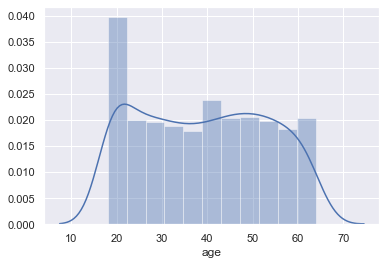

In [2]:
#Distribution plot for the field age,bmi and charges

print(sns.distplot(mydata['age']))

#Age field is normally distributed except for few outliers




AxesSubplot(0.125,0.125;0.775x0.755)


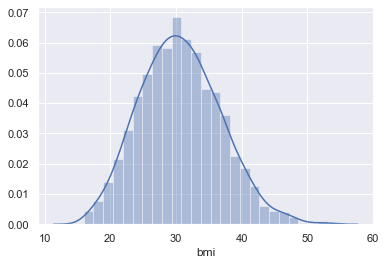

In [3]:
print(sns.distplot(mydata['bmi']))

#bmi field is normally distributed


AxesSubplot(0.125,0.125;0.775x0.755)


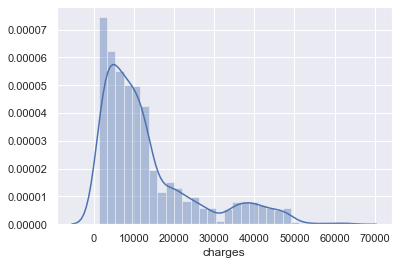

In [4]:
print(sns.distplot(mydata['charges']))

#charges field is right skewed as the tail is long in the right side.

In [5]:
#skewness of bmi,age and charges column
age_series = mydata["age"];
age_skew = age_series.skew();
print("Skewness Age:");
print(round(age_skew,2));

Skewness Age:
0.06


In [6]:
bmi_series = mydata["bmi"];
bmi_skew = bmi_series.skew();
print("Skewness BMI:");
print(round(bmi_skew,2));

Skewness BMI:
0.28


In [7]:
charges_series = mydata["charges"];
charges_skew = charges_series.skew();
print("Skewness Charges:");
print(round(charges_skew,2));

Skewness Charges:
1.52


In [8]:
#Age is almost normally distributed so the skewness value is near to zero. 
#The fields BMI is also normally distributed as the skewness value is near to zero
#The fields charges is right skewed as the skewness value is more than 1 and positive

AxesSubplot(0.125,0.125;0.775x0.755)


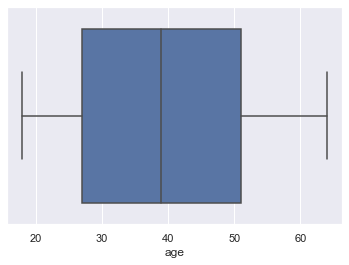

In [9]:
#presence of outliers in the fields age,bmi and charges
print(sns.boxplot(mydata['age']))

In [10]:
#presence of outliers in the fields age,bmi and charges

outliers=[]
#function to determine outlier using z score. if the z score is greater than 3 than we can classify that point as an outlier. 
#Any point outside of 3 standard deviations would be an outlier.

def detect_outlier(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
#call the function using charges data
outlier_charges = detect_outlier(charges_series)
print(outlier_charges)


[51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


AxesSubplot(0.125,0.125;0.775x0.755)


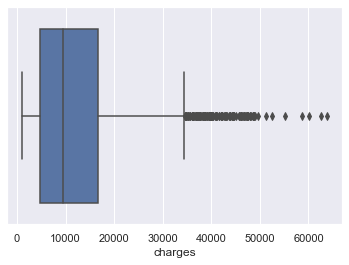

In [11]:
#Another method to find outlier is using the boxplot.
print(sns.boxplot(mydata['charges']))

AxesSubplot(0.125,0.125;0.775x0.755)


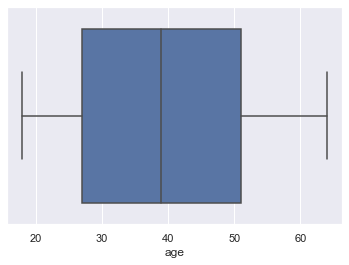

In [12]:
#No outliers in the age field
print(sns.boxplot(mydata['age']))

In [13]:
#Another method to find outlier is the IQR

def outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((data>upper_bound)|(data<lower_bound))
    
for i in outliers_iqr(mydata.bmi)[0]:
    print(mydata[i:i+1]["bmi"])
    
    


116    49.06
Name: bmi, dtype: float64
286    48.07
Name: bmi, dtype: float64
401    47.52
Name: bmi, dtype: float64
543    47.41
Name: bmi, dtype: float64
847    50.38
Name: bmi, dtype: float64
860    47.6
Name: bmi, dtype: float64
1047    52.58
Name: bmi, dtype: float64
1088    47.74
Name: bmi, dtype: float64
1317    53.13
Name: bmi, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


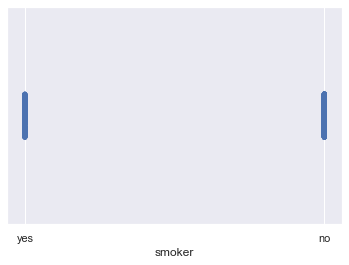

In [14]:
#distribution of categorical columns
print(sns.stripplot(mydata['smoker']))

AxesSubplot(0.125,0.125;0.775x0.755)


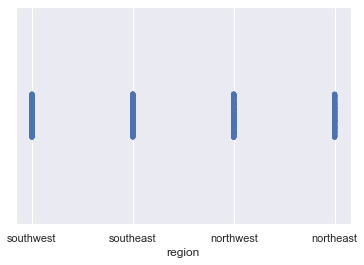

In [15]:
print(sns.stripplot(mydata['region']))

AxesSubplot(0.125,0.125;0.775x0.755)


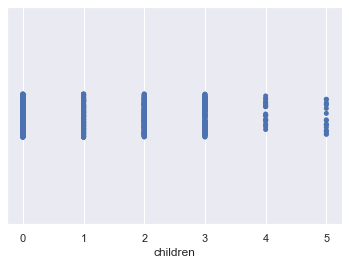

In [16]:
print(sns.stripplot(mydata['children']))

AxesSubplot(0.125,0.125;0.775x0.755)


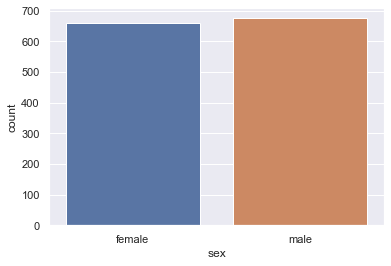

In [17]:
print(sns.countplot(x='sex',data = mydata))

AxesSubplot(0.125,0.125;0.775x0.755)


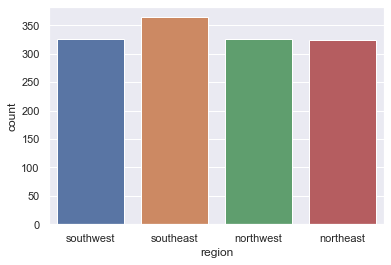

In [18]:
print(sns.countplot(x='region',data = mydata))

AxesSubplot(0.125,0.125;0.775x0.755)


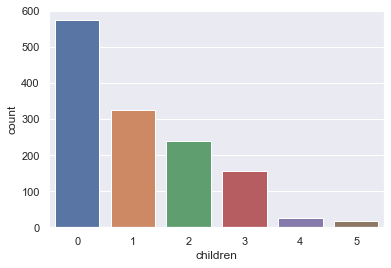

In [19]:
print(sns.countplot(x='children',data = mydata))

AxesSubplot(0.125,0.125;0.775x0.755)


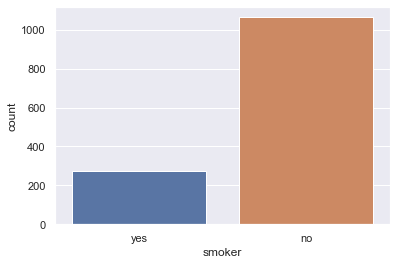

In [20]:
print(sns.countplot(x='smoker',data = mydata))

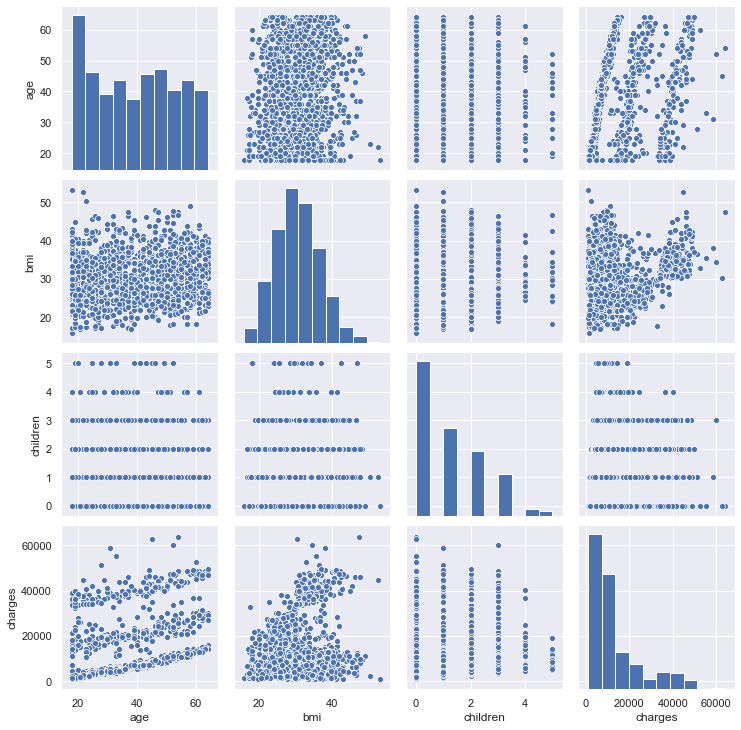

In [21]:
#pair plot for all columns in the data
print(sns.pairplot(mydata))

#Insights from pairplot

#No clear relationship between "age" and "charges". Few records of charges increase with age. 
#No clear relationship between "age" and "children". 
#The range of "bmi" decreases as "children" increases. 
#Linear positive relation between "bmi" and "charges" for few records. But initial set of records between "bmi" and "charges" are crowded
#and no clear relationship
#The range of "charges" decreases as the value of "children" increases.

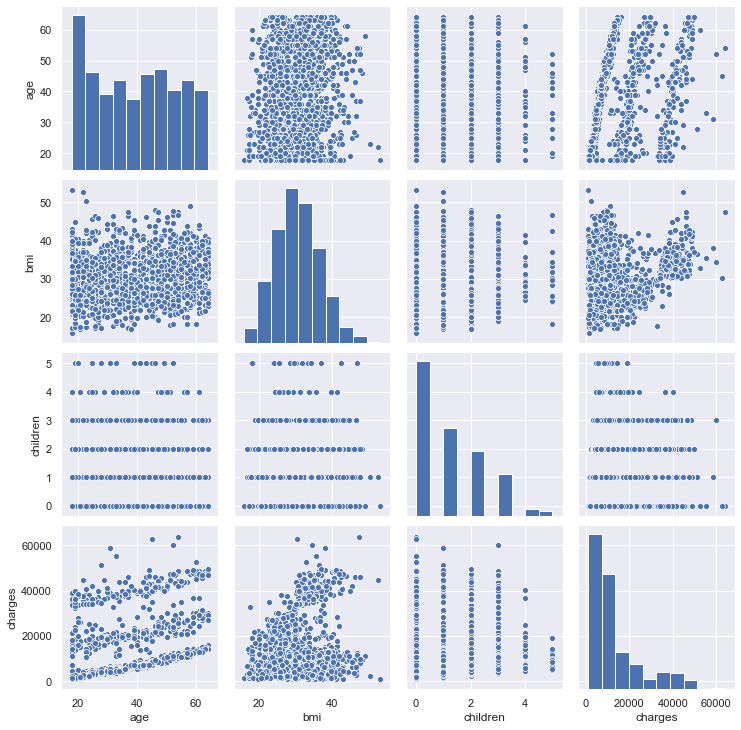

In [22]:
print(sns.pairplot(mydata[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]))
#only numeric and float variables will be considered in pair plots. the rest of fields are not displayed in pair plot

AxesSubplot(0.125,0.125;0.775x0.755)


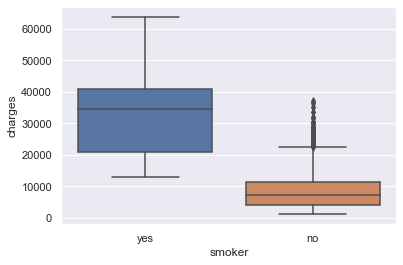

In [23]:
#Question 1:Do charges of people who smoke differ significantly from the people who don't?
#Solution 1: Use boxplot and striplot

print(sns.boxplot(x="smoker", y="charges", data=mydata))


AxesSubplot(0.125,0.125;0.775x0.755)


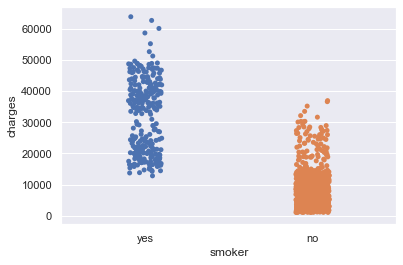

In [24]:
print(sns.stripplot(mydata['smoker'], mydata['charges']))

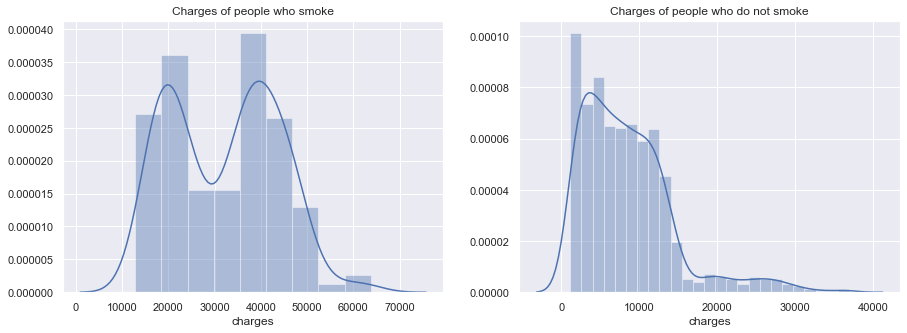

In [25]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(mydata.loc[mydata.smoker == 'yes', 'charges'], ax = ax[0])
sns.distplot(mydata.loc[mydata.smoker =='no', 'charges'], ax = ax[1])

ax[0].set_title('Charges of people who smoke')
ax[1].set_title('Charges of people who do not smoke')
plt.show()

# Not able to come to conclusion based on the distribution plot
# To prove if there is a significant difference or not we will have to perform a hypothesis test
# Since we want to compare the difference in means of the samples, we can use ztest


In [26]:
#Solution 2: Use statistical evidence

#Null hypothesis (Ho) : There is no difference between the charges of people who smoke and people who do not smoke

#Alternate hypothesis (Ha) :  Charges of people who smoke differ significantly from the people who don't

from statsmodels.stats.weightstats import ztest

sample1 = mydata.loc[mydata.smoker == 'yes', 'charges']
sample2 = mydata.loc[mydata.smoker == 'no', 'charges']


alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
#Conclusion for Question 1: Charges of people who smoke differ significantly from the people who don't


Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


AxesSubplot(0.125,0.125;0.775x0.755)


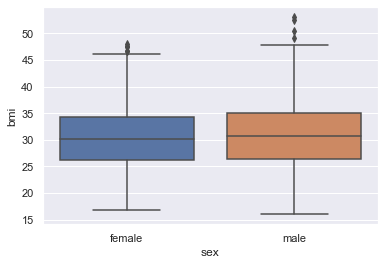

In [27]:
#Question 2:Does bmi of males differ significantly from that of females?
#Solution 1: Use boxplot,striplot,crosstab

print(sns.boxplot(x="sex", y="bmi", data=mydata))

AxesSubplot(0.125,0.125;0.775x0.755)


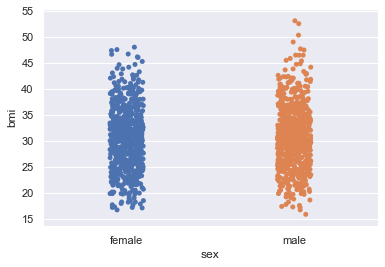

In [28]:
print(sns.stripplot(mydata['sex'], mydata['bmi']))

In [29]:
#Solution 2: Use statistical evidence

#Null hypothesis (Ho) : There is no difference between the bmi of male and female

#Alternate hypothesis (Ha) :  There is significant difference between bmi of male and female

from scipy.stats import ttest_ind
sample3 = mydata.loc[mydata.sex == 'male', 'bmi']
sample4 = mydata.loc[mydata.sex == 'female', 'bmi']

test_statistic, p_value = ttest_ind(sample3, sample4)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
#Conclusion for Question 2: There is no difference between bmi of male and female

	 Since the p-value, 0.09 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


AxesSubplot(0.125,0.125;0.775x0.755)


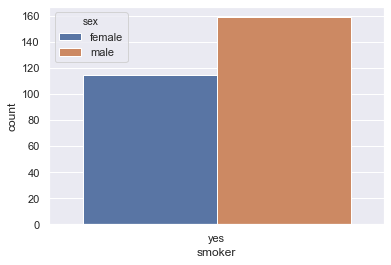

In [30]:
#Question 3:Is the proportion of smokers significantly different in different geneders?
#Solution 1: Use countplot and shape 

smokers_series = mydata.loc[mydata.smoker == 'yes']

print(sns.countplot(x="smoker", hue="sex", data=smokers_series))


In [31]:
total_male = mydata[mydata['sex']=='male'].shape[0]
total_female = mydata[mydata['sex']=='female'].shape[0]
total_smokers_male= mydata[(mydata['smoker'] == 'yes') & (mydata['sex'] == 'male')].shape[0]
total_smokers_female= mydata[(mydata['smoker'] == 'yes') & (mydata['sex'] == 'female')].shape[0]
prop_male_smokers =total_smokers_male/total_male
prop_female_smokers =total_smokers_female/total_female

print("Total count of male smokers is ",total_smokers_male)
print("Total count of female smokers is ", total_smokers_female) 
print("Proportion of smokers who are male is ",prop_male_smokers) 
print("Proportion of smokers who are female is ",prop_female_smokers)

Total count of male smokers is  159
Total count of female smokers is  115
Proportion of smokers who are male is  0.23520710059171598
Proportion of smokers who are female is  0.17371601208459214


In [32]:
#Statistical method using ztest

tot_male = mydata.sex.value_counts()['male']
tot_female = mydata.sex.value_counts()['female']
male_smokers= mydata.smoker[mydata.sex == 'male'].value_counts().loc['yes']
female_smokers= mydata.smoker[mydata.sex == 'female'].value_counts().loc['yes']

print("Total count of male smokers is ",male_smokers)
print("Total count of female smokers is ", female_smokers) 

Total count of male smokers is  159
Total count of female smokers is  115


In [33]:
print("Proportion of smokers who are male is ",male_smokers/tot_male) 
print("Proportion of smokers who are female is ",female_smokers/tot_female)

Proportion of smokers who are male is  0.23520710059171598
Proportion of smokers who are female is  0.17371601208459214


In [34]:
#Null hypothesis (Ho) : There is no difference between the proportions

#Alternate hypothesis (Ha) :  there is difference between the proportions

from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([male_smokers, female_smokers], [tot_male, tot_female])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
#Conclusion of Question 3: The proportion of smokers is significantly different in different genders.

Since the p-value, 0.005 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


AxesSubplot(0.125,0.125;0.775x0.755)


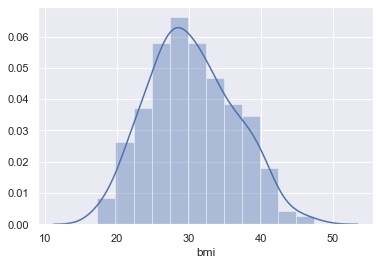

In [35]:
#Question 4:Is the distribution of bmi across women with no children, one child and two children,the same?
#Solution 1: Using dist plot


female_data = mydata.loc[mydata.sex == 'female']
female_children_0 = female_data.loc[mydata.children == 0]
female_children_1 = female_data.loc[mydata.children == 1]
female_children_2 = female_data.loc[mydata.children == 2]

print(sns.distplot(female_children_0['bmi']))




AxesSubplot(0.125,0.125;0.775x0.755)


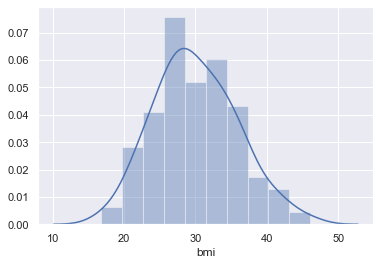

In [36]:
print(sns.distplot(female_children_1['bmi']))

AxesSubplot(0.125,0.125;0.775x0.755)


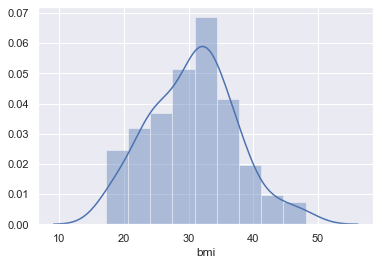

In [37]:
print(sns.distplot(female_children_2['bmi']))

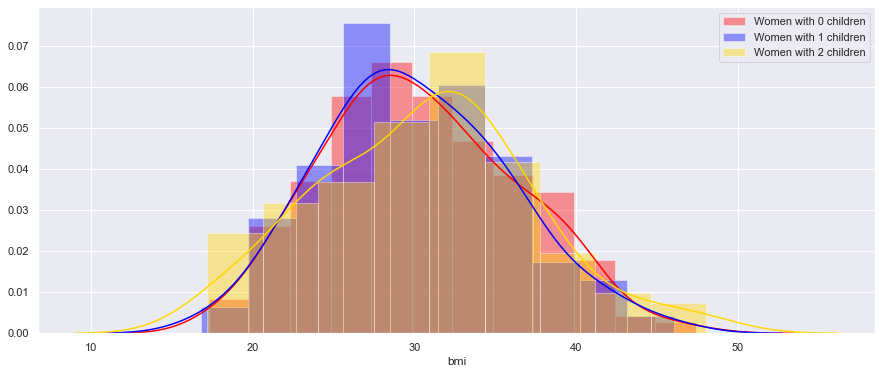

In [38]:
plt.figure(figsize=(15,6))
sns.distplot(female_children_0['bmi'], color = 'Red', label = 'Women with 0 children')
sns.distplot(female_children_1['bmi'], color = 'Blue', label = 'Women with 1 children')
sns.distplot(female_children_2['bmi'], color = 'Gold', label = 'Women with 2 children')
plt.legend()
plt.show()


In [39]:
#Statistical solution for question 4

zero_children_bmi = female_children_0['bmi']
one_children_bmi = female_children_1['bmi']
two_children_bmi = female_children_2['bmi']

from scipy.stats import f_oneway
stat, p_value = f_oneway(zero_children_bmi, one_children_bmi, two_children_bmi)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')




	 Since the p-value, 0.716 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [40]:
#Conclusion of Question 4: The distributions of ‘bmi’ are nearly same across women with 0, 1 or 2 children